Authored by Rajath Kumar M P

March 12, 2016

github.com/rajathkumarmp

# Analyzing Titanic Passenger Data

In [1]:
%pylab inline

import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
titanic_df = pd.read_csv("train.csv")

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [17]:
# Removing data which will not be utilized for the analysis

titanic_age = titanic_df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked'], axis=1)

# Since only 714 of the 891 passengers are available. We shall remove all details of the passenger 
# whose age is not available. As age is a important factor in my analysis.

titanic_age_df = titanic_age.dropna()

# Mapping 'Male' to 0 and 'Female' to 1 for ease of analysis.

titanic_age_df.loc[titanic_age_df["Sex"] == "male", "Sex"] = 0
titanic_age_df.loc[titanic_age_df["Sex"] == "female", "Sex"] = 1

In [4]:
titanic_age_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 4 columns):
Survived    714 non-null int64
Pclass      714 non-null int64
Sex         714 non-null object
Age         714 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.9+ KB


In [5]:
passenger_age = list(titanic_age_df['Age'].values)
passenger_class = list(titanic_age_df['Pclass'].values)
passenger_survived = list(titanic_age_df['Survived'].values)
passenger_gender = list(titanic_age_df['Sex'].values)

In [6]:
def group_func(k,j):
    '''This function increments each considered variable whenever 
    it occurs in the data considered'''
    
    grouped_age[k]+=1
    
    if passenger_class[j] == 1:
        grouped_1class[k]+=1
    elif passenger_class[j] == 2:
        grouped_2class[k]+=1
    else:
        grouped_3class[k]+=1
    
    if passenger_gender[j] == 1:
        grouped_gender_female[k]+=1
    else:
        grouped_gender_male[k]+=1
        
    if passenger_survived[j] == 1:
        grouped_survival[k]+=1
        
        if passenger_gender[j] == 1:
            grouped_survival_female[k]+=1
        else:
            grouped_survival_male[k]+=1
        
        if passenger_class[j] == 1:
            grouped_1class_survival[k]+=1
        elif passenger_class[j] == 2:
            grouped_2class_survival[k]+=1
        else:
            grouped_3class_survival[k]+=1
            

def percentage(data1, data2):
    '''Returns the percentage'''
    
    a = (data1.astype(float)/data2)*100
    return a

In [7]:
# Making all variables global as it has to be accessed by the function

global grouped_age
global grouped_survival

global grouped_survival_male
global grouped_survival_female

global grouped_gender_male
global grouped_gender_female

global grouped_1class
global grouped_2class
global grouped_3class

global grouped_1class_survival
global grouped_2class_survival
global grouped_3class_survival

# Inititalizing each variable to an numpy array

grouped_age = np.array([0]*8)
grouped_survival = np.array([0]*8)

grouped_survival_male = np.array([0]*8)
grouped_survival_female = np.array([0]*8)

grouped_gender_male = np.array([0]*8)
grouped_gender_female = np.array([0]*8)

grouped_1class = np.array([0]*8)
grouped_2class= np.array([0]*8)
grouped_3class = np.array([0]*8)
grouped_1class_survival= np.array([0]*8) 
grouped_2class_survival = np.array([0]*8) 
grouped_3class_survival = np.array([0]*8)


# Grouping the data with respect to the age

for j in range(len(passenger_age)):
    i = passenger_age[j]
    if i>0 and i<10:
        group_func(0,j)
        
    if i>=10 and i<20:
        group_func(1,j)
                
    if i>=20 and i<30:
        group_func(2,j)
        
    if i>=30 and i<40:
        group_func(3,j)
        
    if i>=40 and i<50:
        group_func(4,j)
        
    if i>=50 and i<60:
        group_func(5,j)
        
    if i>=60 and i<70:
        group_func(6,j)
        
    if i>=70 and i<=80:
        group_func(7,j)

In [8]:
# Calculating percentage

percentage_survival = percentage(grouped_survival,grouped_age)
percentage_1class_survival = percentage(grouped_1class_survival,grouped_1class)
percentage_2class_survival = percentage(grouped_2class_survival,grouped_2class)
percentage_3class_survival = percentage(grouped_3class_survival,grouped_3class)
percentage_survival_male = percentage(grouped_survival_male,grouped_gender_male)
percentage_survival_female = percentage(grouped_survival_female,grouped_gender_female)

In [9]:
# for plotting

x_axis_age = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80']

In [10]:
# Creating a result panda dataframe

result_df = pd.DataFrame({
        'Grouped Age': grouped_age, 
        'Grouped People Survived': grouped_survival, 
        '% Survival': percentage_survival,
        'Grouped Gender Male': grouped_gender_male,
        'Grouped Gender Female': grouped_gender_female,
        'Grouped Survival Male': grouped_survival_male,
        'Grouped Survival Female': grouped_survival_female,
        'Grouped 1 class': grouped_1class,
        'Grouped 2 class': grouped_2class,
        'Grouped 3 class': grouped_3class,
        'Grouped 1 class survival': grouped_1class_survival,
        'Grouped 2 class survival': grouped_2class_survival,
        'Grouped 3 class survival': grouped_3class_survival,
        '% 1 class survival': percentage_1class_survival,
        '% 2 class survival': percentage_2class_survival,
        '% 3 class survival': percentage_3class_survival,
        '% Male survival': percentage_survival_male,
        '% Female survival': percentage_survival_female
    },x_axis_age)

# Analysis

## What are the factors that made people more likely to survive?

#### Let us first consider the age factor

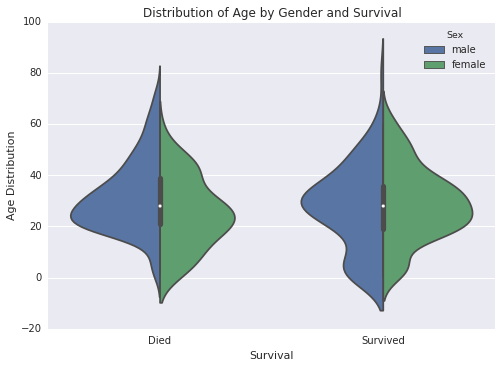

In [11]:
p = sns.violinplot(data = titanic_df, x = 'Survived', y = 'Age', hue = 'Sex', split = True)
p.set(title = 'Distribution of Age by Gender and Survival', xlabel = 'Survival', ylabel = 'Age Distribution', xticklabels = ['Died', 'Survived'])

#### Going in depth, analyzing how many people are present in a particular age group and their survival chances.

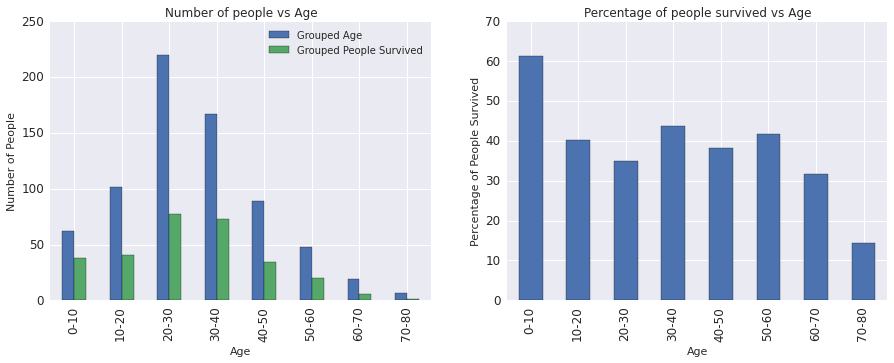

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2)
graph_1 = result_df[['Grouped Age','Grouped People Survived']].plot(kind='bar', title ="Number of people vs Age",figsize=(15,5),legend=True, fontsize=12, ax = axes[0])
graph_1.set_xlabel('Age')
graph_1.set_ylabel('Number of People')
graph_2 = result_df[['% Survival']].plot(kind='bar', title ="Percentage of people survived vs Age",figsize=(15,5),legend=False, fontsize=12, ax = axes[1])
graph_2.set_xlabel('Age')
graph_2.set_ylabel('Percentage of People Survived')
plt.show()

* Children (Age Group 1-10) were more likely to survive.
* Age group 20-30 followed by 70-80 had the most number of deaths 

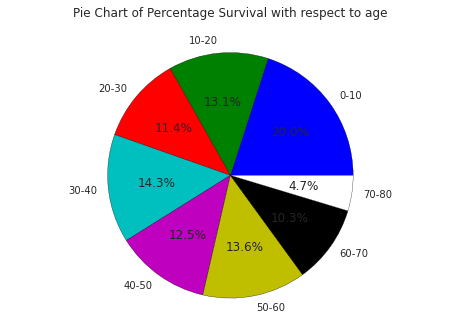

In [13]:
# Analyzing the percentage survival in a pie chart

x_list = percentage_survival
label_list = x_axis_age
plt.axis("equal")
plt.pie(x_list, labels=label_list, autopct="%1.1f%%")
plt.title("Pie Chart of Percentage Survival with respect to age")
plt.show()

#### Did gender of the passenger play a role in survival?

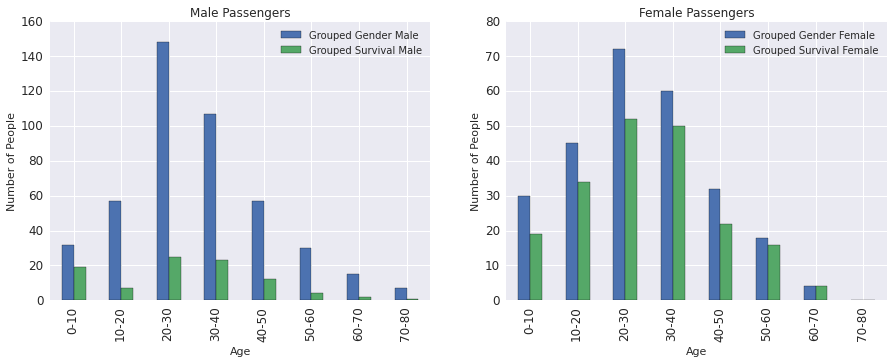

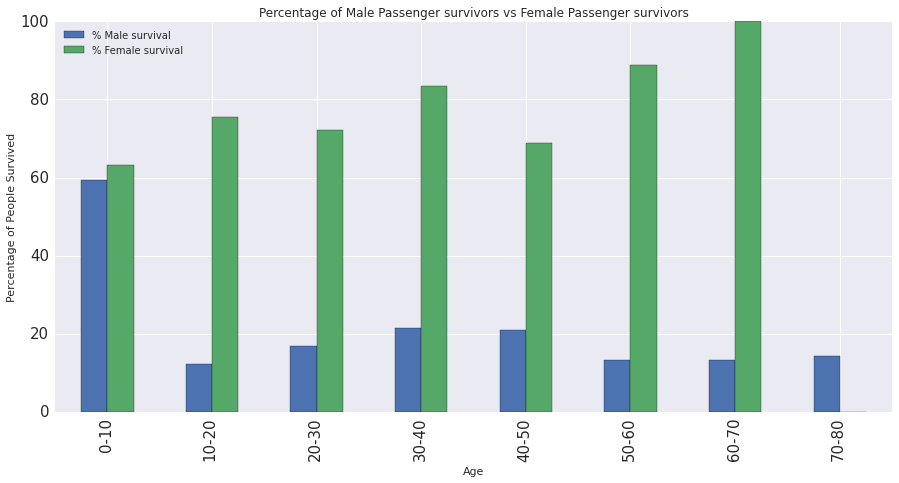

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2)
graph_1 = result_df[['Grouped Gender Male','Grouped Survival Male']].plot(kind='bar', title ="Male Passengers",figsize=(15,5),legend=True, fontsize=12, ax = axes[0])
graph_1.set_xlabel('Age')
graph_1.set_ylabel('Number of People')
graph_2 = result_df[['Grouped Gender Female','Grouped Survival Female']].plot(kind='bar', title ="Female Passengers",figsize=(15,5),legend=True, fontsize=12, ax = axes[1])
graph_2.set_xlabel('Age')
graph_2.set_ylabel('Number of People')
graph_3 = result_df[['% Male survival','% Female survival']].plot(kind='bar', title ="Percentage of Male Passenger survivors vs Female Passenger survivors",figsize=(15,7),legend=True,fontsize=15)
graph_3.set_xlabel('Age')
graph_3.set_ylabel('Percentage of People Survived')
plt.show()

It is evident from the graph that

* All kids (0-10) had approximately equal survival rate irrespective of their gender
* All old female passengers (60-70) were saved, thus can conclude were given highest preference.
* Female passengers of all age groups had more than 60% survival chance and Male passengers had less than 22% survival rate

#### Did the socio economic status of a passenger had anything to do with their chances of survival?

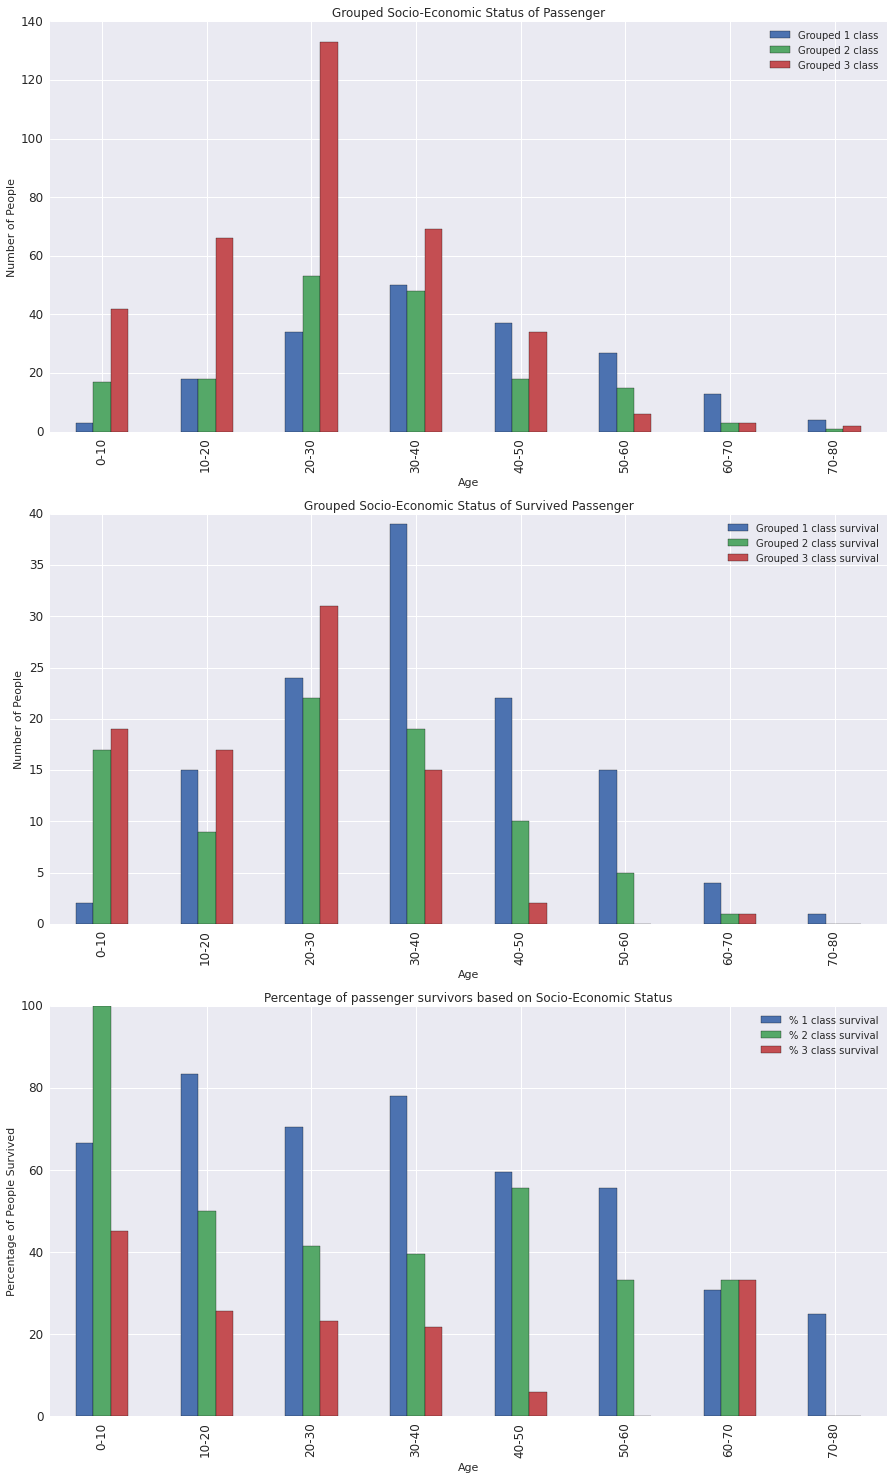

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=1)
graph_1 = result_df[['Grouped 1 class','Grouped 2 class','Grouped 3 class']].plot(kind='bar', title ="Grouped Socio-Economic Status of Passenger",figsize=(15,25),legend=True, fontsize=12, ax = axes[0])
graph_1.set_xlabel('Age')
graph_1.set_ylabel('Number of People')
graph_2 = result_df[['Grouped 1 class survival','Grouped 2 class survival','Grouped 3 class survival']].plot(kind='bar', title ="Grouped Socio-Economic Status of Survived Passenger",figsize=(15,25),legend=True, fontsize=12, ax = axes[1])
graph_2.set_xlabel('Age')
graph_2.set_ylabel('Number of People')
graph_3 = result_df[['% 1 class survival','% 2 class survival','% 3 class survival']].plot(kind='bar', title ="Percentage of passenger survivors based on Socio-Economic Status",figsize=(15,25),legend=True,fontsize=12, ax= axes[2])
graph_3.set_xlabel('Age')
graph_3.set_ylabel('Percentage of People Survived')
plt.show()

* Excluding the children category and 60-70 age group. It is clear that chances of survival was highest for a 1st class passenger followed by 2nd class and then 3rd class.

### Limitations of this analysis

* All passenger details are not considered, since age is a important considerations here, passengers without age data have been dropped.
* When the entire 2224 passengers on board the ship are considered, results may vary as we are considered 1/3rd of the data.
* If the cabin which a passenger was residing in would have been in the lower berths of the ship then there is a possibility that they would have died early as soon as water occupied the lower berths.
* If 3rd class passenger were given lower berths or 1st class passenger were given upper berths or most females and children occupied the upper berths then that also would explain the high survival rate
* Cabin number is provided in the data, with further details on which floor the cabin was located would make the analysis more interesting.

### Statistical Tests

#### Since the variables are not normally distributed we use the kruskal wallis test to ascertain the data of passenger class.

In [16]:
from scipy import stats

h_static, p_value = stats.mstats.kruskalwallis(grouped_1class_survival,grouped_2class_survival,grouped_3class_survival)

print p_value

0.59797755583


#### Since p value is more than 0.05 we can say that the means of the results of all three are not significantly different and are likely with a true null.